заданные функции

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def phi1(y):
    return np.cos(y)
def phi2(y):
    return 0
def phi3(x):
    return np.cos(x)
def phi4(x):
    return 0
def solution(x, y):
    return np.cos(x)*np.cos(y)
def norm(u):
    return np.abs(u).max()

In [2]:

l = np.pi / 2
N = 10

аналитическое решение задачи

In [3]:
def analitic_solve(l, N, solution):
    h = l / (N - 1)
    u = np.zeros((N, N))
    for x in range(N):
        for y in range(N):
            u[x][y] = solution(x * h, y * h)
    return u

функция заполнения u0

In [4]:
def get_u0(N, l):
    size = N - 1
    h = l / size
    u = np.zeros((N, N))
    for j in range(N):
        u[0][j] = phi1(j * h)
        u[-1][j] = phi2(j * h)
        u[j][0] = phi3(j * h)
        u[j][-1] = phi4(j * h)
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            u[i][j] = h * i * u[i][0] + h * j * u[0][j] + (l - h * i) * u[i][-1] + (l - h * j) * u[-1][j]
    return u

метод Лимбмана

In [5]:
def limbman(N, l, eps):
    size = N - 1
    h = l / size
    u = get_u0(N, l)
    k = 0
    while k == 0 or norm(u - u_prev) > eps:
        u_prev = u.copy()
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                u[i][j] = (u_prev[i+1][j] + u_prev[i-1][j] + u_prev[i][j+1] + u_prev[i][j-1]) / (4 - 2 * h ** 2)
        k += 1
    return u, k

метод Зейделя

In [6]:
def zeidel(N, l, eps):
    size = N - 1
    h = l / size
    u = get_u0(N, l)
    k = 0
    while k == 0 or norm(u - u_prev) > eps:
        u_prev = u.copy()
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                u[i][j] = (u_prev[i + 1][j] + u[i - 1][j] + u_prev[i][j + 1] + u[i][j - 1]) / (4 - 2 * h ** 2)
        k += 1
    return u, k

метод простых итераций с верхней релаксацией

In [ ]:
def with_relax(N, l, eps, c):
    size = N - 1
    h = l / size
    u = get_u0(N, l)
    k = 0
    while k == 0 or norm(u - u_prev) > eps:
        u_prev = u.copy()
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                u[i][j] = (1 - c) * u_prev[i][j] + c * ((u_prev[i + 1][j] + u[i - 1][j] + u_prev[i][j + 1] + u[i][j - 1]) / (4 - 2 * h ** 2))
        k += 1
    return u, k

количество шагов для сходимости каждого метода

In [ ]:
analitic = analitic_solve(l, N, solution)
limbman_s = limbman(N, l, 0.001)
print(limbman_s[1])
zeidel_s = zeidel(N, l, 0.001)
print(zeidel_s[1])
with_relax_s = with_relax(N, l, 0.001, 1.5)
print(with_relax_s[1])

построенные графики (аналитически, Лимбман, Зейдель, верхняя релаксация)

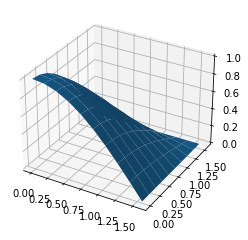

In [12]:
x = np.linspace(0,l,N)
y = np.linspace(0,l,N)
x_plt, t_plt = np.meshgrid(x, y)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,t_plt,np.array(analitic))
plt.show()

In [13]:
#%matplotlib notebook

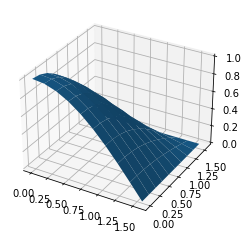

In [14]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,t_plt,np.array(limbman_s[0]))
plt.show()

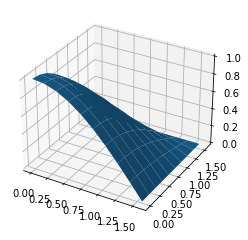

In [15]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,t_plt,np.array(zeidel_s[0]))
plt.show()

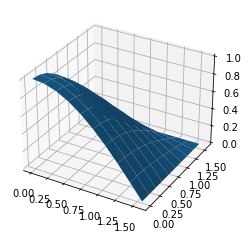

In [16]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,t_plt,np.array(with_relax_s[0]))
plt.show()

погрешности каждого метода

In [17]:
def pogr(u, res):
    return np.sqrt(sum([sum([(u[i][j]-res[i][j])**2 for j in range(len(x))]) for i in range(len(y))]))

In [18]:
print(pogr(limbman_s[0], analitic))
print(pogr(zeidel_s[0], analitic))
print(pogr(with_relax_s[0], analitic))

0.0943016816911137
0.04460112096437301
0.009295647251482082
